# Inventory

This is the second notebook of a series of 5 (see below the names of full list) intended to teach you the functionalities of the pyhton-based LCA software Brightway 2.5 (BW25) that you will use to carry out your group assignment. For a more nuanced undertsanding of the principles and working mechanisms of BW25 you are referred to [its documentation](https://docs.brightway.dev/en/latest/index.html).

**Full list of notebooks of the series:**
- 1.Getting started
- 2a.Background
- 2b.Foreground
- 3.StaticLCA
- 4.StochasticLCA


## Pre-requesites:

- Having read the tutorial _Computational Settings and Guidelines_ that you can find on Canvas -> [Module 'General documents & Information'](https://canvas.utwente.nl/courses/15132/modules#:~:text=General%20documents%20%26%20information-,General,-documents%20%26%20information)
- Having installed Brightway25 and all relevant packages (make sure to do so in the correct virtual environment) and eventually having had a first contact with its [documentation](https://docs.brightway.dev/en/latest/index.html).
- Knowledge of the foundations of life cycle assessment (LCA). If you did not attended the _Lecture 3- Pavement Life cycle assessment (LCA)_ or need a refresher, please have a look at its slides that you can find on Canvas.
- Access to the ecoinvent database version 3.9.1.
- Familiarity with the Python programming language and the Jupyter Lab environment. However, this is **not** a hard requirement since most methods are quite intuitive and will be explained throughput the tutorial. Nevertheless, In case you are a total beginner, or need a refresher, please read the tutorial _Computational Settings and Guidelines_ that you can find on Canvas -> [Module 'General documents & Information'](https://canvas.utwente.nl/courses/15132/modules#:~:text=General%20documents%20%26%20information-,General,-documents%20%26%20information)


## Learning Objectives
- Learn about the general structure of Brightway and its most importand abstractions: databases, activities and exchanges
- Learn how to find objects (notably activities and exchanges), assign them to variables and work with them using their associated methods


## Content
2.1) Setting up the background system: 
- [biosphere3 database](#biosphere)
- [ecoinvent database](#ecoinvent)



## 2.1) Setting up the background system: 

To carry out your group assigment you will need two databases: 
- biosphere3, that contains all the exchanges and impact assessment methods, and
- ecoinvent.

But first, let's import the BW25 packages

In [2]:
# Import BW25 packages
import bw2data as bd
import bw2io as bi
import bw2calc as bc
import bw2analyzer as bwa

### Biosphere3 <a name="biosphere"></a>

#### Importing biosphere3

Before importing biosphere3, let's check the projects you have created:

In [42]:
bd.projects 

Brightway2 projects manager with 6 objects:
	20240831_Test
	2024_STI_BW25_Lecture
	Test_location_specifc_folder
	bw25_20240406
	bw25_test
	default
Use `projects.report()` to get a report on all projects.

In [43]:
# Activate the project we are working on
bd.projects.set_current('2024_STI_BW25_Lecture') 

 Let’s see what databases you have in the current project:

In [44]:
# If this is your first time using this project, this should be an empty dictionary! 
bd.databases

Databases dictionary with 3 object(s):
	asphalt
	biosphere3
	ecoinvent-391-cutoff

Now we can add the biosphere flows. This is done by running the `bw2setup` function:

(This will also create the LCIA methods. But more about that will be explored later)

In [15]:
bi.bw2setup()

Creating default biosphere

Applying strategy: normalize_units
Applying strategy: drop_unspecified_subcategories
Applying strategy: ensure_categories_are_tuples
Applied 3 strategies in 0.00 seconds


100%|████████████████████████████████████| 4709/4709 [00:00<00:00, 47863.52it/s]


Vacuuming database 
Created database: biosphere3
Creating default LCIA methods

Wrote 762 LCIA methods with 227223 characterization factors
Creating core data migrations



Check the databases. You should now see "biosphere3"

In [45]:
bd.databases

Databases dictionary with 3 object(s):
	asphalt
	biosphere3
	ecoinvent-391-cutoff

#### Navigating biosphere3

There are many properties and functions associated with this `database` object. To access those, let's assign the database to a variable:

In [46]:
my_bio = bd.Database('biosphere3')

Let's check the my_bio `type`:

In [47]:
type(my_bio)

bw2data.backends.base.SQLiteBackend

Let's check its length:

In [48]:
len(my_bio)

4709

If you type `my_bio.` and click on tab, you should get a list of properties and methods associated with database objects. 

In [11]:
my_bio.get

<bound method SQLiteBackend.get of Brightway2 SQLiteBackend: biosphere3>

Some of the most basic we will be using are:

- `random()` - returns a random activity in the database
- `get(*valid_exchange_tuple*)` - returns an activity, but you must know the activity key
- `load()` - loads the whole database as a dictionary.
- `make_searchable` - allows searching of the database (by default, it is already searchable)
- `search` - search the database

Let's start with random:

In [12]:
my_bio.random()

'Energy, potential (in hydropower reservoir), converted' (megajoule, None, ('natural resource', 'in water'))

This returns a biosphere activity, but without assigning it to a variable, there is not much we can do with it directly.

**Note**: It may seem counter-intuitive for elementary flows to be considered activities in Brightway, but this is not a mistake. LCA models are made up of nodes (activities) that are linked by edges (exchanges). The biosphere activities are the nodes outside the technosphere. Emissions and resource extractions are modelled as exchanges between activities in the technosphere (part of the product system) and these biosphere activities. More on this later.

For now, let's assign another random activity to a variable:

In [14]:
random_biosphere = my_bio.random()
random_biosphere

'Cyanide' (kilogram, None, ('air',))

We can get the type of the object that was returned from the database:

In [15]:
type(random_biosphere)

bw2data.backends.proxies.Activity

The type is an activity proxy. Activity proxies allow us to interact with the content of the database. In Brightway, we almost always work with `Activity` and `Exchange` objects.

To see what the activity contains, we can convert it to a dictionary:

In [16]:
random_biosphere.as_dict()

{'categories': ('air',),
 'code': 'd3e038e1-728c-4dea-ac30-c9abbbfcbc84',
 'CAS number': '000057-12-5',
 'synonyms': ['Cyanide ion', 'Cyanide (-1)'],
 'name': 'Cyanide',
 'database': 'biosphere3',
 'unit': 'kilogram',
 'type': 'emission',
 'id': 1271}

We can get the value of each item by specifying its key. Example: let's get the value corresponding to the key `code`

In [17]:
random_biosphere['code']

'd3e038e1-728c-4dea-ac30-c9abbbfcbc84'

Now for the key `unit`

In [18]:
random_biosphere['unit']

'kilogram'

Activities in the biosphere3 database have unique codes, which we can use with the `get` function:

In [19]:
my_bio.get(random_biosphere['code'])

'Cyanide' (kilogram, None, ('air',))

As you can see this is the same activity! This is expected because we are "getting" the activity with the code equal to our random biosphere variable. And remember: Activities in the biosphere3 (and ecoinvent) database have unique codes.

You can always find (or return) the key to an activity using the `.key` property.

In [21]:
random_biosphere.key

('biosphere3', 'd3e038e1-728c-4dea-ac30-c9abbbfcbc84')

Activities can also be "gotten" with `get_activity`, but the argument is the activity key, consisting of a tuple with two elements: the database name, and the activity code. Let's use `get_activity` to get the activity that we got randomly before:

In [15]:
bd.get_activity(('biosphere3', 'd3e038e1-728c-4dea-ac30-c9abbbfcbc84'))

'Cyanide' (kilogram, None, ('air',))

As we could expect, this is exactly the same activity.

**Searching for activities**

Let's say we are looking for a specific elementary flow. For this purpose we can use the `search` method of the database

In [25]:
bd.Database('biosphere3').search('carbon dioxide') # there is more than one activity with this name. Only code is univocal.

['Carbon dioxide, fossil' (kilogram, None, ('air', 'low population density, long-term')),
 'Carbon dioxide, fossil' (kilogram, None, ('air',)),
 'Carbon dioxide, fossil' (kilogram, None, ('air', 'lower stratosphere + upper troposphere')),
 'Carbon dioxide, fossil' (kilogram, None, ('air', 'non-urban air or from high stacks')),
 'Carbon dioxide, fossil' (kilogram, None, ('air', 'urban air close to ground')),
 'Carbon dioxide, non-fossil' (kilogram, None, ('air', 'lower stratosphere + upper troposphere')),
 'Carbon dioxide, non-fossil' (kilogram, None, ('air', 'non-urban air or from high stacks')),
 'Carbon dioxide, non-fossil' (kilogram, None, ('air', 'urban air close to ground')),
 'Carbon dioxide, non-fossil' (kilogram, None, ('air', 'low population density, long-term')),
 'Carbon dioxide, in air' (kilogram, None, ('natural resource', 'in air')),
 'Carbon dioxide, non-fossil' (kilogram, None, ('air',)),
 'Carbon dioxide, non-fossil, resource correction' (kilogram, None, ('natural reso

We can do the same operation by using the variable we assigned previously to the biosphere database

In [23]:
my_bio.search('carbon dioxide')

['Carbon dioxide, fossil' (kilogram, None, ('air', 'low population density, long-term')),
 'Carbon dioxide, fossil' (kilogram, None, ('air',)),
 'Carbon dioxide, fossil' (kilogram, None, ('air', 'lower stratosphere + upper troposphere')),
 'Carbon dioxide, fossil' (kilogram, None, ('air', 'non-urban air or from high stacks')),
 'Carbon dioxide, fossil' (kilogram, None, ('air', 'urban air close to ground')),
 'Carbon dioxide, non-fossil' (kilogram, None, ('air', 'lower stratosphere + upper troposphere')),
 'Carbon dioxide, non-fossil' (kilogram, None, ('air', 'non-urban air or from high stacks')),
 'Carbon dioxide, non-fossil' (kilogram, None, ('air', 'urban air close to ground')),
 'Carbon dioxide, non-fossil' (kilogram, None, ('air', 'low population density, long-term')),
 'Carbon dioxide, in air' (kilogram, None, ('natural resource', 'in air')),
 'Carbon dioxide, non-fossil' (kilogram, None, ('air',)),
 'Carbon dioxide, non-fossil, resource correction' (kilogram, None, ('natural reso

It is also possible to use "filters" to narrow searches, e.g.

In [17]:
my_bio.search('carbon dioxide', filter={'categories':'urban', 'name':'fossil'})

Excluding 17 filtered results


['Carbon dioxide, fossil' (kilogram, None, ('air', 'non-urban air or from high stacks')),
 'Carbon dioxide, fossil' (kilogram, None, ('air', 'urban air close to ground')),
 'Carbon dioxide, non-fossil' (kilogram, None, ('air', 'non-urban air or from high stacks')),
 'Carbon dioxide, non-fossil' (kilogram, None, ('air', 'urban air close to ground'))]

We can also use "home-made" searches with list comprehensions. This approach allow us to add as many criteria as we want.

In [18]:
[act for act in my_bio if 'Carbon dioxide' in act['name'] 
                                            and 'fossil' in act['name']
                                            and 'non' not in act['name']
                                            and 'urban air close to ground' in str(act['categories'])
         ]

['Carbon dioxide, fossil' (kilogram, None, ('air', 'urban air close to ground'))]

Activities returned by searches or list comprehensions can be assigned to variables, but to do so, we need to identify the activity by index. Based on the above, we can refine the filters to ensure the list comprehension only returns one activity, and that that activity is the one we really want.

In [19]:
activity_I_want = [act for act in my_bio if 'Carbon dioxide' in act['name'] 
                                            and 'fossil' in act['name']
                                            and 'non' not in act['name']
                                            and 'urban air close to ground' in str(act['categories'])
         ][0]

In [20]:
print(activity_I_want)

'Carbon dioxide, fossil' (kilogram, None, ('air', 'urban air close to ground'))


Again, you can see what the activity contains by convert it to a dictionary:

In [21]:
activity_I_want.as_dict()

{'categories': ('air', 'urban air close to ground'),
 'code': 'f9749677-9c9f-4678-ab55-c607dfdc2cb9',
 'CAS number': '000124-38-9',
 'synonyms': ['Carbon dioxide'],
 'name': 'Carbon dioxide, fossil',
 'database': 'biosphere3',
 'unit': 'kilogram',
 'type': 'emission',
 'id': 112}

In [ ]:
We can get the value of a given key, b

In [30]:
activity_I_want['code']

'f9749677-9c9f-4678-ab55-c607dfdc2cb9'

**LCIA Methods**

As mentioned before `bi.bw2setup()` also installed ***LCIA methods***. LCIA methods are a set of principles, models and characteriation factors that convert biosphere flows into environment impacts scores.

Run the code below to know the methods we have access to:

In [22]:
list(bd.methods)
#bd.methods.list #this produces the same outputs

[('CML v4.8 2016 no LT',
  'acidification no LT',
  'acidification (incl. fate, average Europe total, A&B) no LT'),
 ('CML v4.8 2016 no LT',
  'climate change no LT',
  'global warming potential (GWP100) no LT'),
 ('CML v4.8 2016 no LT',
  'ecotoxicity: freshwater no LT',
  'freshwater aquatic ecotoxicity (FAETP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'ecotoxicity: marine no LT',
  'marine aquatic ecotoxicity (MAETP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'ecotoxicity: terrestrial no LT',
  'terrestrial ecotoxicity (TETP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'energy resources: non-renewable no LT',
  'abiotic depletion potential (ADP): fossil fuels no LT'),
 ('CML v4.8 2016 no LT',
  'eutrophication no LT',
  'eutrophication (fate not incl.) no LT'),
 ('CML v4.8 2016 no LT',
  'human toxicity no LT',
  'human toxicity (HTP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'material resources: metals/minerals no LT',
  'abiotic depletion potential (ADP): elements (ultimate reserves) no LT')

For each method, the 1st name is the name of the impact assessment methodology, the 2nd name is the name of the impact category, and the 3rd name is the name of the characterization model. Let's take as an exmaple ('CML v4.8 2016', 'acidification', 'acidification (incl. fate, average Europe total, A&B)': 

- 'CML v4.8 2016' = impact assessment methodology
- 'acidification' = impact category
- 'acidification (incl. fate, average Europe total, A&B)' = characterization model/method


We can get more details about the LCIA methods. Those details are stored as values (`bw.methods.values()`), with the LCIA method names being the keys (`bw.methods.keys()`):

In [25]:
for key in bd.methods:
    print(key, ':', bd.methods[key])

('CML v4.8 2016 no LT', 'acidification no LT', 'acidification (incl. fate, average Europe total, A&B) no LT') : {'description': '', 'filename': 'LCIA_Implementation_3.9.xlsx', 'unit': 'kg SO2-Eq', 'abbreviation': 'cml-v48-2016-no-ltaa.9326888b5dfc8ad763461e87dc5a0a9e', 'num_cfs': 21, 'geocollections': ['world']}
('CML v4.8 2016 no LT', 'climate change no LT', 'global warming potential (GWP100) no LT') : {'description': '', 'filename': 'LCIA_Implementation_3.9.xlsx', 'unit': 'kg CO2-Eq', 'abbreviation': 'cml-v48-2016-no-ltcg.ef26e472ac5329eeba834f793ba181a9', 'num_cfs': 149, 'geocollections': ['world']}
('CML v4.8 2016 no LT', 'ecotoxicity: freshwater no LT', 'freshwater aquatic ecotoxicity (FAETP inf) no LT') : {'description': '', 'filename': 'LCIA_Implementation_3.9.xlsx', 'unit': 'kg 1,4-DCB-Eq', 'abbreviation': 'cml-v48-2016-no-ltef.7bcf2b54b0276df08edfbd557353fcec', 'num_cfs': 692, 'geocollections': ['world']}
('CML v4.8 2016 no LT', 'ecotoxicity: marine no LT', 'marine aquatic eco

To access the description of only one characterization method, we can use the `get` function using as argument the name of the characterization method. For example:

In [26]:
bd.methods.get(('CML v4.8 2016', 'climate change', 'global warming potential (GWP100)'))

{'description': '',
 'filename': 'LCIA_Implementation_3.9.xlsx',
 'unit': 'kg CO2-Eq',
 'abbreviation': 'cml-v48-2016cg.231d6e8f8b1c199a47182515eba4032e',
 'num_cfs': 185,
 'geocollections': ['world']}

We can also get the value of an item by specifying the corresponding key and using the `get` function. Let's imagine we want to know the units considered by the characterization method:

In [27]:
bd.methods.get(('CML v4.8 2016', 'climate change', 'global warming potential (GWP100)')).get('unit')

'kg CO2-Eq'

As we did with the biosphere activities, we can also assign variables to characterization methods:

In [29]:
my_method = bd.methods.get(('CML v4.8 2016', 'climate change', 'global warming potential (GWP100)'))
type(my_method)

dict

We can then get the value corresponding to the key we are interested in. Let's consider again we want to know the units of the characterization method:

In [30]:
my_method['unit']

'kg CO2-Eq'

We can get the same information by using the `get` function:

In [31]:
my_method.get('unit')

'kg CO2-Eq'

We can also search for a specific method using list comprehensions. In your group assignment you will work with a LCIA methodology called _CML_, and specifically the version 4.8, released in 2016. To know all impact categories and respective characterization methods considered by CML v4.8, we can type:

In [32]:
[m for m in bd.methods if 'CML v4.8 2016' in str(m)]

[('CML v4.8 2016 no LT',
  'acidification no LT',
  'acidification (incl. fate, average Europe total, A&B) no LT'),
 ('CML v4.8 2016 no LT',
  'climate change no LT',
  'global warming potential (GWP100) no LT'),
 ('CML v4.8 2016 no LT',
  'ecotoxicity: freshwater no LT',
  'freshwater aquatic ecotoxicity (FAETP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'ecotoxicity: marine no LT',
  'marine aquatic ecotoxicity (MAETP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'ecotoxicity: terrestrial no LT',
  'terrestrial ecotoxicity (TETP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'energy resources: non-renewable no LT',
  'abiotic depletion potential (ADP): fossil fuels no LT'),
 ('CML v4.8 2016 no LT',
  'eutrophication no LT',
  'eutrophication (fate not incl.) no LT'),
 ('CML v4.8 2016 no LT',
  'human toxicity no LT',
  'human toxicity (HTP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'material resources: metals/minerals no LT',
  'abiotic depletion potential (ADP): elements (ultimate reserves) no LT')

The query above resulted in two "types" of CML. One is what we were looking for ('CML v4.8 2016') and another one is 'CML v4.8 2016 no LT', where LT stands for Land Transformation. We can get exactly the one we are looking for by refining the search as follows:

In [32]:
[m for m in bd.methods if 'CML v4.8 2016' in str(m) and not 'no LT' in str(m)]

[('CML v4.8 2016',
  'acidification',
  'acidification (incl. fate, average Europe total, A&B)'),
 ('CML v4.8 2016', 'climate change', 'global warming potential (GWP100)'),
 ('CML v4.8 2016',
  'ecotoxicity: freshwater',
  'freshwater aquatic ecotoxicity (FAETP inf)'),
 ('CML v4.8 2016',
  'ecotoxicity: marine',
  'marine aquatic ecotoxicity (MAETP inf)'),
 ('CML v4.8 2016',
  'ecotoxicity: terrestrial',
  'terrestrial ecotoxicity (TETP inf)'),
 ('CML v4.8 2016',
  'energy resources: non-renewable',
  'abiotic depletion potential (ADP): fossil fuels'),
 ('CML v4.8 2016', 'eutrophication', 'eutrophication (fate not incl.)'),
 ('CML v4.8 2016', 'human toxicity', 'human toxicity (HTP inf)'),
 ('CML v4.8 2016',
  'material resources: metals/minerals',
  'abiotic depletion potential (ADP): elements (ultimate reserves)'),
 ('CML v4.8 2016',
  'ozone depletion',
  'ozone layer depletion (ODP steady state)'),
 ('CML v4.8 2016',
  'photochemical oxidant formation',
  'photochemical oxidation (h

Let's select now the characterization method of the impact category 'Ozone depletion' considered by the LCIA methodology 'ReCiPe 2016', version v1.03, midpoint (E) no LT.

In [33]:
Ozone_depletion = [m for m in bd.methods if 'ReCiPe 2016 v1.03, midpoint (E) no LT' 
                   in str(m) and 'ozone depletion no LT' in str(m)][0]
type(Ozone_depletion)
print(Ozone_depletion)

('ReCiPe 2016 v1.03, midpoint (E) no LT', 'ozone depletion no LT', 'ozone depletion potential (ODPinfinite) no LT')


We can also set the characterization method as an object and benefit from the multiple 'Methods' associated with a python object. In python, methods are functions associated with an object, and can manipulate and perform actions on it. Let's consider we are interested in the impact category 'Climate Change' and respective characterization method, considered by 'CML v4.8 2016':

In [34]:
cml_ClimateChange_method = bd.Method(('CML v4.8 2016', 'climate change', 'global warming potential (GWP100)'))

In [35]:
type(cml_ClimateChange_method)

bw2data.method.Method

There are multiple methods associated with a method object. You can access these by typing cml_ClimateChange_method. and clicking tab.
For example, metadata:

In [36]:
cml_ClimateChange_method.metadata

{'description': '',
 'filename': 'LCIA_Implementation_3.9.xlsx',
 'unit': 'kg CO2-Eq',
 'abbreviation': 'cml-v48-2016cg.231d6e8f8b1c199a47182515eba4032e',
 'num_cfs': 185,
 'geocollections': ['world']}

In [37]:
cml_ClimateChange_method.metadata['unit']

'kg CO2-Eq'

We can get the same information by using the `get` function:

In [37]:
cml_ClimateChange_method.metadata.get('unit')

'kg CO2-Eq'

As you know, CFs are used to transform the LCI results into environmental impact category results. Thus, it might be interesting to know the elementary flows and corresponding CFs associated witht a given LCIA method. We can do this by using the `load` method 

We can get the elementary flows and corresponding CFs associated witht the LCIA method by doing the following:

In [45]:
cml_ClimateChange_method.load()

[(['biosphere3', 'f9749677-9c9f-4678-ab55-c607dfdc2cb9'], 1),
 (['biosphere3', '4cadbc9f-0472-4bb9-a942-df5b90e37878'], 16),
 (['biosphere3', 'fa0c2bee-8dd9-4f8a-8489-b1f3b43de958'], 1300),
 (['biosphere3', '818cee9e-231c-4b53-8ed2-47a0001802d5'], 160),
 (['biosphere3', 'f43b2b80-f5a6-4d31-9980-0754305a978d'], 4800),
 (['biosphere3', '033d3a16-e1a2-4ce8-8769-f4ea867801ca'], 782),
 (['biosphere3', '393d0862-04cc-45ae-8d08-9dc2a4461b35'], 138),
 (['biosphere3', '400be66e-4383-482a-93e3-c005e96de261'], 1980),
 (['biosphere3', 'db907ff7-6cf0-4f88-9376-116262dfad6d'], 79),
 (['biosphere3', '27f61651-96a5-45c7-9873-832626cf6905'], 527),
 (['biosphere3', '15e54d5b-aba2-40a6-9aa8-aa2b8c432129'], 7670),
 (['biosphere3', 'df5dd437-2e12-4af6-8f7a-9c8224857dc5'], 11100),
 (['biosphere3', '5d1701c5-c4ef-49c7-8a68-ce7c255eee9f'], 3170),
 (['biosphere3', '4bf1c333-419b-4278-ac14-247c8bf563d6'], 2),
 (['biosphere3', '816c43d1-bc30-4a72-81db-08cb6be4da4f'], 1750),
 (['biosphere3', '18ddd879-5496-4419-8

The results are tuples with (elementary flow, characterization factors).

**Exercise**: Lets create a dictionary that has as key the name of the elemenyary flows and as value the corresponding CF, for the CML Climate Change method


In [62]:
GWP_dict = {my_bio.get(ef[0][1]):ef[1] for ef in cml_ClimateChange_method.load()}
GWP_dict

{'Carbon dioxide, fossil' (kilogram, None, ('air', 'urban air close to ground')): 1,
 'Chloroform' (kilogram, None, ('air', 'urban air close to ground')): 16,
 'Ethane, 1,1,1,2-tetrafluoro-, HFC-134a' (kilogram, None, ('air', 'urban air close to ground')): 1300,
 'Ethane, 1,1,1-trichloro-, HCFC-140' (kilogram, None, ('air', 'urban air close to ground')): 160,
 'Ethane, 1,1,1-trifluoro-, HFC-143a' (kilogram, None, ('air', 'urban air close to ground')): 4800,
 'Ethane, 1,1-dichloro-1-fluoro-, HCFC-141b' (kilogram, None, ('air', 'urban air close to ground')): 782,
 'Ethane, 1,1-difluoro-, HFC-152a' (kilogram, None, ('air', 'urban air close to ground')): 138,
 'Ethane, 1-chloro-1,1-difluoro-, HCFC-142b' (kilogram, None, ('air', 'urban air close to ground')): 1980,
 'Ethane, 2,2-dichloro-1,1,1-trifluoro-, HCFC-123' (kilogram, None, ('air', 'urban air close to ground')): 79,
 'Ethane, 2-chloro-1,1,1,2-tetrafluoro-, HCFC-124' (kilogram, None, ('air', 'urban air close to ground')): 527,
 'Etha

### Ecoinvent <a name="ecoinvent"></a>

#### Importing Ecoinvent

The second database that you will need to carry out your group assignment is the ecoinvent databse. You can learn the fundamentals of the ecoinvent Database by following [this](https://support.ecoinvent.org/e-learning-fundamentals-database) e-learning course. If you want to know more about it, you can also check [this](https://support.ecoinvent.org/database)

Before importing it to your project you need to get the ecoinvent files. To do so, follow the following steps:
- Go to STI course's Canvas ->[Module _ecoinvent Database_](https://canvas.utwente.nl/courses/15132/modules#:~:text=ecoinvent%20database-,ecoinvent,-database)
- Download the file `ecoinvent 3.9.1_cutoff_ecoSpold02.7z`  in a folder of yours. Make sure you remember the full path to this directory.
- The file you have downloaded is a compressed archive of many files (like with winzip or winrar). Extract the files from the .7z archive, e.g. by double clicking it, to a new folder called "datasets". If it does not work, install a software that can do that. 
Now you should be to run cells below. Make sure you change the path line and replace it with the one where you have extracted the files. 


Let’s see the projects you have created:

In [3]:
bd.projects #Checked the projects you created

Brightway2 projects manager with 6 objects:
	20240831_Test
	2024_STI_BW25_Lecture
	Test_location_specifc_folder
	bw25_20240406
	bw25_test
	default
Use `projects.report()` to get a report on all projects.

In [36]:
# Activate the project we are working on
bd.projects.set_current('2024_STI_BW25_Lecture') 

 Let’s see what databases we have:

In [37]:
# If this is your first time using this project, this should be an empty dictionary! 
bd.databases

Databases dictionary with 3 object(s):
	asphalt
	biosphere3
	ecoinvent-391-cutoff

Let's import the ecoinvent database:

In [38]:
#directory where the ecoinvent is saved
#ei_path = "ecoinvent 3.9.1_cutoff_ecoSpold02/datasets"
ei_path = "/Users/joaosantos/Library/CloudStorage/OneDrive-UniversityofTwente/UT_Academic Life/My Software Purchase/ecoinvent v3.9.1/datasets"

# Give the database a name. In this course we will use ecoinvent v3.9.1 cutoff.
ei_name = "ecoinvent-391-cutoff"

if ei_name in bd.databases:
    print("Database has already been imported")
else:
    # Go ahead and import:
    ei_importer = bi.SingleOutputEcospold2Importer(ei_path, ei_name)
    # Apply stragegies 
    ei_importer.apply_strategies()
    # We can get some statistics
    ei_importer.statistics()
    # Now we will write the database into our project. 
    ei_importer.write_database()
    

Database has already been imported


In the future, whenever you run the cell above, you will get the message _Database has already been imported_, if you have already imported the ecoinvent database set as _current project_

Let's see the databases we have in our working project:

In [39]:
bd.databases

Databases dictionary with 3 object(s):
	asphalt
	biosphere3
	ecoinvent-391-cutoff

The database we have just imported is now in our project. Let's assign it to a variable:

In [40]:
eidb = bd.Database(ei_name)

In [41]:
print("The imported ecoinvent database is of type {} and has a length of {}.".format(type(eidb), len(eidb)))

The imported ecoinvent database is of type <class 'bw2data.backends.base.SQLiteBackend'> and has a length of 21238.


If you want to delete a database execute `del bd.databases['<database_name>']`

#### Navigating ecoinvent

##### LCI activities

In the context of LCI databases, activities are the nodes "within the technosphere". They are therefore the columns in the technosphere matrix A.

There are different ways to get access to an activity. Similarly to the biosphere database, we can use the `random()` method  to explore a random activity in the ecoinvent database.

In [27]:
random_act = eidb.random()
print(random_act)

'electricity production, hydro, run-of-river' (kilowatt hour, CN-GX, None)


In [28]:
type(random_act)

bw2data.backends.proxies.Activity

To know what is stored in an activity object, let's convert our random act in a dictionary:

In [29]:
from pprint import pprint
pprint(random_act.as_dict())

{'activity': 'b3cc3c22-9c78-5fb0-b406-cc8a3e66a393',
 'activity type': 'ordinary transforming activity',
 'authors': {'data entry': {'email': 'karin.treyer@psi.ch',
                            'name': 'Karin Treyer'},
             'data generator': {'email': 'karin.treyer@psi.ch',
                                'name': 'Karin Treyer'}},
 'classifications': [('ISIC rev.4 ecoinvent',
                      '3510:Electric power generation, transmission and '
                      'distribution'),
                     ('EcoSpold01Categories', 'hydro power/power plants'),
                     ('CPC', '17100: Electrical energy')],
 'code': '35c0af863238d75e089417f1c781be7e',
 'comment': 'This dataset represents the production of 1 kWh of electricity in '
            'a run-of-river power plant unit in China - Guangxi in 2012. '
            'Run-of-river power plants are hydro power plants without '
            'reservoirs. Depending on the net head of the power plant, '
            'high-pre

Another way to get the same info consists of using the method `._data`. 

In [30]:
random_act._data

{'comment': 'This dataset represents the production of 1 kWh of electricity in a run-of-river power plant unit in China - Guangxi in 2012. Run-of-river power plants are hydro power plants without reservoirs. Depending on the net head of the power plant, high-pressure, medium-pressure and low-pressure systems can be distinguished. Low-pressure power plants including river power stations and canal power plants are very common; therefore these two types of run-of-river power stations are covered in the dataset. To some extent, high-pressure as well as medium-pressure run-of-river systems can be considered as reservoir power stations, e.g. as unit in plant groups that are dominated by storage power plants, but also include alpine run power stations.\nLCI data are based on a representative sample of various types of power plants in Switzerland and Austria is taken into account. The calculations are based on the information and data of the following run-of-river power plants: Rupperswil-Auen

We can get acess to the value of each key by using the function `get()`. Let's take as an example the key 'reference product'. The corresponding value is retrieved by running the cell below:

In [91]:
random_act.get('reference product')

'energy feed, gross'

Two alternative ways to obtain the same info are given below:

In [92]:
random_act._data['reference product']

'energy feed, gross'

In [93]:
random_act['reference product']

'energy feed, gross'

We can also use the search method to search for specific activities. Let's search for three activities that commonly used in pavement LCA studies, namely the (1) production of limestone, (2) production of bitumen, and (2) transportation 

In [94]:
# Using search
eidb.search('limestone')

['limestone quarry operation' (kilogram, IN, None),
 'limestone quarry operation' (kilogram, CA-QC, None),
 'market for limestone, unprocessed' (kilogram, CH, None),
 'limestone quarry operation' (kilogram, RoW, None),
 'market for limestone, unprocessed' (kilogram, IN, None),
 'limestone quarry operation' (kilogram, CH, None),
 'market for limestone residue' (kilogram, CH, None),
 'limestone quarry construction' (unit, CH, None),
 'recultivation, limestone mine' (square meter, CH, None),
 'recultivation, limestone mine' (square meter, RoW, None),
 'market for limestone, unprocessed' (kilogram, RoW, None),
 'market for limestone residue' (kilogram, RoW, None),
 'limestone production, crushed, washed' (kilogram, CA-QC, None),
 'limestone quarry construction' (unit, RoW, None),
 'limestone production, crushed, washed' (kilogram, CH, None),
 'market for limestone, crushed, washed' (kilogram, CH, None),
 'market for limestone, crushed, washed' (kilogram, RoW, None),
 'limestone production,

The code above retrieves multiple activities involving limestone. We can refine the search by using filter with as many criteria as we want (provided that they are valid):

In [95]:
# Using search
act_name = 'limestone' 
eidb.search(act_name, filter={'location':'ROW', 'name':'crushed'})


Excluding 257 filtered results


['market for limestone, crushed, washed' (kilogram, RoW, None),
 'limestone production, crushed, washed' (kilogram, RoW, None),
 'market for limestone, crushed, for mill' (kilogram, RoW, None),
 'limestone production, crushed, for mill' (kilogram, RoW, None),
 'limestone, crushed, washed to generic market for supplementary cementitious materials' (kilogram, RoW, None),
 'gravel production, crushed' (kilogram, RoW, None)]

...refining the search a bit more:

In [96]:
eidb.search(act_name, filter={'location':'ROW', 'name':'crushed', 'name':'washed'})

Excluding 260 filtered results


['market for limestone, crushed, washed' (kilogram, RoW, None),
 'limestone production, crushed, washed' (kilogram, RoW, None),
 'limestone, crushed, washed to generic market for supplementary cementitious materials' (kilogram, RoW, None)]

It might be useful to know the code of the activities retrived. That can be accomplished by running the following code:

In [36]:
for activity in eidb.search(act_name, filter={'location':'RoW', 'name':'washed','name':'crushed'}):
    print(activity)
    print(activity['code'])

Excluding 257 filtered results
'market for limestone, crushed, washed' (kilogram, RoW, None)
f02db7dc2aa90b15c39e38e5b2871a63
'limestone production, crushed, washed' (kilogram, RoW, None)
570143a9c955c81d5f8bc1e9bd8d22a1
'market for limestone, crushed, for mill' (kilogram, RoW, None)
80668cba452d7daa47ec2b932c503fd2
'limestone production, crushed, for mill' (kilogram, RoW, None)
c0505f1c9c2dc2f1a86b087089a33987
'limestone, crushed, washed to generic market for supplementary cementitious materials' (kilogram, RoW, None)
16f5ec192027775224682821f0453d17
'gravel production, crushed' (kilogram, RoW, None)
0cff374b6cd6c946c75f0a8dc694ab66


This search resulted in six activities. Let's consider we are interested in selecting the activity _limestone production, crushed, washed_, which is the second of the list, and we want to assign it to a variable called my_act. Invariably, there are many ways to do this. One of them is presented below:

In [97]:
my_act = eidb.get('570143a9c955c81d5f8bc1e9bd8d22a1')
print(my_act)


'limestone production, crushed, washed' (kilogram, RoW, None)


The search method can also be used with list comprehension:

In [100]:
[act for act in eidb if 'limestone' in act['name']
        and 'crushed' in act['name']
        and 'washed' in act['name']
        and 'RoW' in act['location']
]

['market for limestone, crushed, washed' (kilogram, RoW, None),
 'limestone production, crushed, washed' (kilogram, RoW, None),
 'limestone, crushed, washed to generic market for supplementary cementitious materials' (kilogram, RoW, None)]

In [101]:
[act for act in eidb if 'limestone' in act['name']
        and 'crushed' in act['name']
        and 'washed' in act['name']
        and 'RoW' in act['location']
][2] 

'limestone production, crushed, washed' (kilogram, RoW, None)

So far we have been searching for ecoinvent activities by using only BW functionalies. However, the ecoinvent database has an [query website](https://ecoquery.ecoinvent.org/3.9.1/cutoff/search) that allow us to search for activities. It is important to make sure the version of the database where we are searching is the same as that we installed before (i.e., version 3.9.1). You can check that by selecting the right version in the upper left corner of the website.

Let's search for the activity _market for limestone, crushed, washed' (kilogram, RoW, None)_ in the ecoinvent query website. You can see the list of results [here](https://ecoquery.ecoinvent.org/3.9.1/cutoff/search?query=%27market+for+limestone%2C+crushed%2C+washed%27+%28kilogram%2C+RoW%2C+None%29&currentPage=1&pageSize=5). 

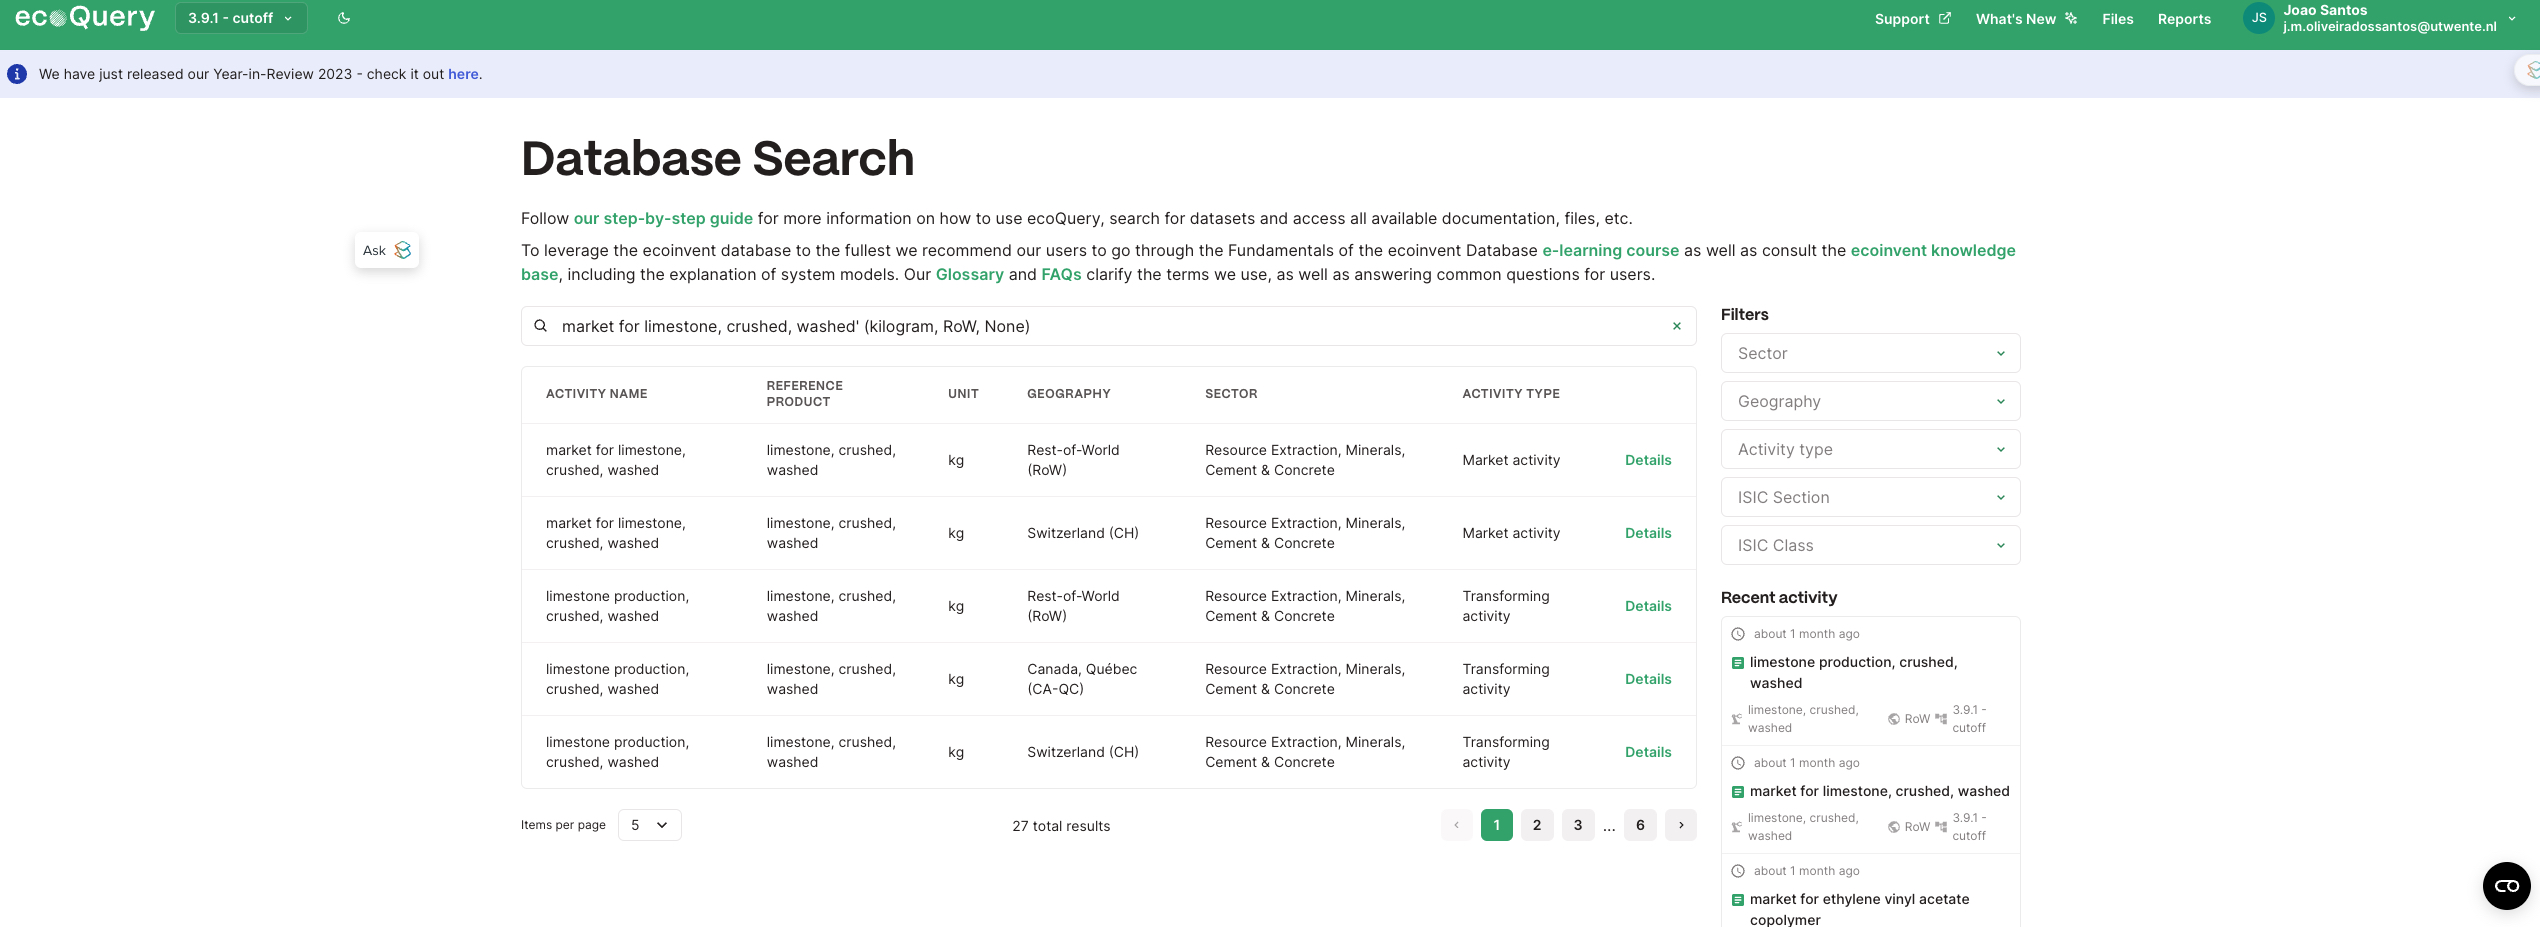

The activity we are looking for is the first in the list. If you click in details you will find general information about the activity and the reference product (i.e., limestone, crushed, washed). As you can see, the information presented in "General Comment" is the same as that you will get if you run the code below:

In [102]:
my_act_comment = my_act['comment']
print(my_act_comment)

Infrastructure data are estimated based on a site visit and sketches of the process. The value of the infrastructure is normalized with a annual production capacity of about 195'000 tons of product per year. The estimated lifespan of the machines is 25 years. Assumed size partition of dust emissions for crushing, screening and transport processes: 50% >10µm (PM10), 45% between 10 µm and 2.5 µm, 5%<2.5 µm. Limestone, crushed, washed is a pre-product for the milling process. 50% of the electricity consumption is covered by the grid and 50% by a hydropower plant nearby. The infrastructure for electricity transportation from power plant to KFN is not included. 50% of the electricity consumption is covered by the grid and 50% by a hydropower plant nearby. The infrastructure for electricity transportation from power plant to KFN is not included.
Geography:  data are from only one company in Switzerland (KFN), for some exchanges RER-modules have been used as proxy
Technology:  The company wor

**Exercise**: Select the activities that best represent: 
- The production of bitumen used in asphalt mixtures;
- The transportation of materials used in road paving activities

##### LCI exchanges

If you remember, exchanges are the edges between nodes. These can be:

- an edge between two activities within the technosphere (an element aij of A matrix)
- edges between an activity in the technosphere and an activity in the "biosphere" (an element bkj of the biosphere matrix B).
  
One can iterate through all exchanges that have a given activity as output. Let's use as example the my_act selected above:

In [66]:
for exc in my_act.exchanges():
    print(exc)


Exchange: 1.0 kilogram 'limestone production, crushed, washed' (kilogram, RoW, None) to 'limestone production, crushed, washed' (kilogram, RoW, None)>
Exchange: 2.07e-08 meter 'market for conveyor belt' (meter, GLO, None) to 'limestone production, crushed, washed' (kilogram, RoW, None)>
Exchange: 0.00340282051282051 megajoule 'market for diesel, burned in building machine' (megajoule, GLO, None) to 'limestone production, crushed, washed' (kilogram, RoW, None)>
Exchange: 0.00036 kilowatt hour 'electricity production, hydro, run-of-river' (kilowatt hour, RoW, None) to 'limestone production, crushed, washed' (kilogram, RoW, None)>
Exchange: 3.257040190842405e-06 kilowatt hour 'market for electricity, medium voltage' (kilowatt hour, AU, None) to 'limestone production, crushed, washed' (kilogram, RoW, None)>
Exchange: 0.00019666777449851402 kilowatt hour 'market group for electricity, medium voltage' (kilowatt hour, RAS, None) to 'limestone production, crushed, washed' (kilogram, RoW, None)

We can also get a dataframe with the exchanges:

In [41]:
df = my_act.exchanges().to_dataframe()
df

,target_id,target_database,target_code,target_name,target_reference_product,target_location,target_unit,target_type,source_id,source_database,source_code,source_name,source_product,source_location,source_unit,source_categories,edge_amount,edge_type
0,18765,ecoinvent-391-cutoff,570143a9c955c81d5f8bc1e9bd8d22a1,"limestone production, crushed, washed","limestone, crushed, washed",RoW,kilogram,process,18765,ecoinvent-391-cutoff,570143a9c955c81d5f8bc1e9bd8d22a1,"limestone production, crushed, washed",NaN,RoW,kilogram,NaN,1.000000e+00,production
1,18765,ecoinvent-391-cutoff,570143a9c955c81d5f8bc1e9bd8d22a1,"limestone production, crushed, washed","limestone, crushed, washed",RoW,kilogram,process,24372,ecoinvent-391-cutoff,a488782f7800de7d14428a06b101ea17,market for conveyor belt,NaN,GLO,meter,NaN,2.070000e-08,technosphere
2,18765,ecoinvent-391-cutoff,570143a9c955c81d5f8bc1e9bd8d22a1,"limestone production, crushed, washed","limestone, crushed, washed",RoW,kilogram,process,5214,ecoinvent-391-cutoff,5efd4061851b2bd322f17830fee57dff,"market for diesel, burned in building machine",NaN,GLO,megajoule,NaN,3.402821e-03,technosphere
3,18765,ecoinvent-391-cutoff,570143a9c955c81d5f8bc1e9bd8d22a1,"limestone production, crushed, washed","limestone, crushed, washed",RoW,kilogram,process,19178,ecoinvent-391-cutoff,2880b6c13294aad8ae1722830aef0a68,"electricity production, hydro, run-of-river",NaN,RoW,kilowatt hour,NaN,3.600000e-04,technosphere
4,18765,ecoinvent-391-cutoff,570143a9c955c81d5f8bc1e9bd8d22a1,"limestone production, crushed, washed","limestone, crushed, washed",RoW,kilogram,process,21215,ecoinvent-391-cutoff,5d542139f4dae4bb990a5d3c34fe5e97,"market for electricity, medium voltage",NaN,AU,kilowatt hour,NaN,3.257040e-06,technosphere
5,18765,ecoinvent-391-cutoff,570143a9c955c81d5f8bc1e9bd8d22a1,"limestone production, crushed, washed","limestone, crushed, washed",RoW,kilogram,process,5438,ecoinvent-391-cutoff,5cb69853f15e2cf372fcf87080a69dac,"market group for electricity, medium voltage",NaN,RAS,kilowatt hour,NaN,1.966678e-04,technosphere
6,18765,ecoinvent-391-cutoff,570143a9c955c81d5f8bc1e9bd8d22a1,"limestone production, crushed, washed","limestone, crushed, washed",RoW,kilogram,process,7759,ecoinvent-391-cutoff,2df74714a5a7c8cc88d704fee4a848dd,"market group for electricity, medium voltage",NaN,US,kilowatt hour,NaN,6.078033e-05,technosphere
7,18765,ecoinvent-391-cutoff,570143a9c955c81d5f8bc1e9bd8d22a1,"limestone production, crushed, washed","limestone, crushed, washed",RoW,kilogram,process,20403,ecoinvent-391-cutoff,2997ec5cb3009726269849a5c8670da2,"market group for electricity, medium voltage",NaN,RLA,kilowatt hour,NaN,2.143499e-05,technosphere
8,18765,ecoinvent-391-cutoff,570143a9c955c81d5f8bc1e9bd8d22a1,"limestone production, crushed, washed","limestone, crushed, washed",RoW,kilogram,process,19925,ecoinvent-391-cutoff,476b68dc744251f288055e5ce8264feb,"market group for electricity, medium voltage",NaN,Europe without Switzerland,kilowatt hour,NaN,4.679869e-05,technosphere
9,18765,ecoinvent-391-cutoff,570143a9c955c81d5f8bc1e9bd8d22a1,"limestone production, crushed, washed","limestone, crushed, washed",RoW,kilogram,process,6829,ecoinvent-391-cutoff,93f2cd71eea1db096c97d46e408e20c8,"market for electricity, medium voltage",NaN,RU,kilowatt hour,NaN,1.457864e-05,technosphere


We can also iterate through subsets of the exchanges:

- **Technosphere exchanges**: exchanges linking to other activities in the technosphere, `activity.technosphere()`
- **Biosphere exchanges**: i.e. elementary flows, linking to activities in the biosphere database `activity.biosphere()`
- **Production exchange**: the reference flow of the activity `activity.production`

We can also get a dataframe with the specific type of exchanges. This is done with the edge constructors `.production()`, `.technosphere()`, and `.biosphere()`.

For instance, to get the Tecnosphere exchanges in a dataframe we can run the cell below:

In [43]:
df_technosphere = my_act.technosphere().to_dataframe()
df_technosphere

,target_id,target_database,target_code,target_name,target_reference_product,target_location,target_unit,target_type,source_id,source_database,source_code,source_name,source_product,source_location,source_unit,source_categories,edge_amount,edge_type
0,18765,ecoinvent-391-cutoff,570143a9c955c81d5f8bc1e9bd8d22a1,"limestone production, crushed, washed","limestone, crushed, washed",RoW,kilogram,process,24372,ecoinvent-391-cutoff,a488782f7800de7d14428a06b101ea17,market for conveyor belt,NaN,GLO,meter,NaN,2.070000e-08,technosphere
1,18765,ecoinvent-391-cutoff,570143a9c955c81d5f8bc1e9bd8d22a1,"limestone production, crushed, washed","limestone, crushed, washed",RoW,kilogram,process,5214,ecoinvent-391-cutoff,5efd4061851b2bd322f17830fee57dff,"market for diesel, burned in building machine",NaN,GLO,megajoule,NaN,3.402821e-03,technosphere
2,18765,ecoinvent-391-cutoff,570143a9c955c81d5f8bc1e9bd8d22a1,"limestone production, crushed, washed","limestone, crushed, washed",RoW,kilogram,process,19178,ecoinvent-391-cutoff,2880b6c13294aad8ae1722830aef0a68,"electricity production, hydro, run-of-river",NaN,RoW,kilowatt hour,NaN,3.600000e-04,technosphere
3,18765,ecoinvent-391-cutoff,570143a9c955c81d5f8bc1e9bd8d22a1,"limestone production, crushed, washed","limestone, crushed, washed",RoW,kilogram,process,21215,ecoinvent-391-cutoff,5d542139f4dae4bb990a5d3c34fe5e97,"market for electricity, medium voltage",NaN,AU,kilowatt hour,NaN,3.257040e-06,technosphere
4,18765,ecoinvent-391-cutoff,570143a9c955c81d5f8bc1e9bd8d22a1,"limestone production, crushed, washed","limestone, crushed, washed",RoW,kilogram,process,5438,ecoinvent-391-cutoff,5cb69853f15e2cf372fcf87080a69dac,"market group for electricity, medium voltage",NaN,RAS,kilowatt hour,NaN,1.966678e-04,technosphere
5,18765,ecoinvent-391-cutoff,570143a9c955c81d5f8bc1e9bd8d22a1,"limestone production, crushed, washed","limestone, crushed, washed",RoW,kilogram,process,7759,ecoinvent-391-cutoff,2df74714a5a7c8cc88d704fee4a848dd,"market group for electricity, medium voltage",NaN,US,kilowatt hour,NaN,6.078033e-05,technosphere
6,18765,ecoinvent-391-cutoff,570143a9c955c81d5f8bc1e9bd8d22a1,"limestone production, crushed, washed","limestone, crushed, washed",RoW,kilogram,process,20403,ecoinvent-391-cutoff,2997ec5cb3009726269849a5c8670da2,"market group for electricity, medium voltage",NaN,RLA,kilowatt hour,NaN,2.143499e-05,technosphere
7,18765,ecoinvent-391-cutoff,570143a9c955c81d5f8bc1e9bd8d22a1,"limestone production, crushed, washed","limestone, crushed, washed",RoW,kilogram,process,19925,ecoinvent-391-cutoff,476b68dc744251f288055e5ce8264feb,"market group for electricity, medium voltage",NaN,Europe without Switzerland,kilowatt hour,NaN,4.679869e-05,technosphere
8,18765,ecoinvent-391-cutoff,570143a9c955c81d5f8bc1e9bd8d22a1,"limestone production, crushed, washed","limestone, crushed, washed",RoW,kilogram,process,6829,ecoinvent-391-cutoff,93f2cd71eea1db096c97d46e408e20c8,"market for electricity, medium voltage",NaN,RU,kilowatt hour,NaN,1.457864e-05,technosphere
9,18765,ecoinvent-391-cutoff,570143a9c955c81d5f8bc1e9bd8d22a1,"limestone production, crushed, washed","limestone, crushed, washed",RoW,kilogram,process,22737,ecoinvent-391-cutoff,5f5a3176d13f86fbfb975cf848bc2178,"market group for electricity, medium voltage",NaN,Canada without Quebec,kilowatt hour,NaN,5.086760e-06,technosphere


...similarly, for the Ecosphere exchanges:

In [103]:
df_ecosphere = my_act.biosphere().to_dataframe()
df_ecosphere

,target_id,target_database,target_code,target_name,target_reference_product,target_location,target_unit,target_type,source_id,source_database,source_code,source_name,source_product,source_location,source_unit,source_categories,edge_amount,edge_type
0,18765,ecoinvent-391-cutoff,570143a9c955c81d5f8bc1e9bd8d22a1,"limestone production, crushed, washed","limestone, crushed, washed",RoW,kilogram,process,4702,biosphere3,66f50b33-fd62-4fdd-a373-c5b0de7de00d,"Particulate Matter, < 2.5 um",NaN,NaN,kilogram,air::non-urban air or from high stacks,8.710000e-07,biosphere
1,18765,ecoinvent-391-cutoff,570143a9c955c81d5f8bc1e9bd8d22a1,"limestone production, crushed, washed","limestone, crushed, washed",RoW,kilogram,process,1780,biosphere3,7678cec7-b8e1-439d-8242-99cd452834b1,"Particulate Matter, > 10 um",NaN,NaN,kilogram,air::non-urban air or from high stacks,8.710000e-06,biosphere
2,18765,ecoinvent-391-cutoff,570143a9c955c81d5f8bc1e9bd8d22a1,"limestone production, crushed, washed","limestone, crushed, washed",RoW,kilogram,process,4706,biosphere3,295c9740-6fdb-4676-9eb8-15e3786f713d,"Particulate Matter, > 2.5 um and < 10um",NaN,NaN,kilogram,air::non-urban air or from high stacks,7.840000e-06,biosphere
3,18765,ecoinvent-391-cutoff,570143a9c955c81d5f8bc1e9bd8d22a1,"limestone production, crushed, washed","limestone, crushed, washed",RoW,kilogram,process,3607,biosphere3,075e433b-4be4-448e-9510-9a5029c1ce94,Water,NaN,NaN,cubic meter,air,5.473164e-05,biosphere
4,18765,ecoinvent-391-cutoff,570143a9c955c81d5f8bc1e9bd8d22a1,"limestone production, crushed, washed","limestone, crushed, washed",RoW,kilogram,process,3613,biosphere3,2404b41a-2eed-4e9d-8ab6-783946fdf5d6,Water,NaN,NaN,cubic meter,water,1.327684e-04,biosphere
5,18765,ecoinvent-391-cutoff,570143a9c955c81d5f8bc1e9bd8d22a1,"limestone production, crushed, washed","limestone, crushed, washed",RoW,kilogram,process,925,biosphere3,67c40aae-d403-464d-9649-c12695e43ad8,"Water, well, in ground",NaN,NaN,cubic meter,natural resource::in water,1.875000e-04,biosphere


Let's now consider we want to know more info about the **first Technosphere exchange**. We can do that by assigning it to a variable:

In [106]:
my_act_techno_exchange = [exc for exc in my_act.technosphere()][0]
my_act_techno_exchange

Exchange: 2.07e-08 meter 'market for conveyor belt' (meter, GLO, None) to 'limestone production, crushed, washed' (kilogram, RoW, None)>

In [107]:
my_act_techno_exchange._data

{'flow': '26f457d5-9138-4502-a0b5-a3726ca8efa6',
 'type': 'technosphere',
 'name': 'conveyor belt',
 'classifications': {'CPC': ['43550: Pneumatic and other continuous action elevators and conveyors, for goods or materials']},
 'production volume': 0.0,
 'properties': {'carbon allocation': {'amount': 0.0, 'unit': 'kg'},
  'carbon content': {'amount': 0.0, 'unit': 'dimensionless'}},
 'activity': '9f6bd803-2e40-5e4b-8618-7aab6956e422',
 'unit': 'meter',
 'comment': 'EcoSpold01Location=RER',
 'amount': 2.07e-08,
 'pedigree': {'reliability': 4,
  'completeness': 3,
  'temporal correlation': 5,
  'geographical correlation': 5,
  'further technological correlation': 1},
 'uncertainty type': 2,
 'loc': -17.69313213667509,
 'scale': 0.608769250208977,
 'scale without pedigree': 0.565685424949238,
 'input': ('ecoinvent-391-cutoff', 'a488782f7800de7d14428a06b101ea17'),
 'output': ('ecoinvent-391-cutoff', '570143a9c955c81d5f8bc1e9bd8d22a1')}

An alternative way to get the same info:

In [108]:
#Exchange as a dictionary
my_act_techno_exchange.as_dict()

{'flow': '26f457d5-9138-4502-a0b5-a3726ca8efa6',
 'type': 'technosphere',
 'name': 'conveyor belt',
 'classifications': {'CPC': ['43550: Pneumatic and other continuous action elevators and conveyors, for goods or materials']},
 'production volume': 0.0,
 'properties': {'carbon allocation': {'amount': 0.0, 'unit': 'kg'},
  'carbon content': {'amount': 0.0, 'unit': 'dimensionless'}},
 'activity': '9f6bd803-2e40-5e4b-8618-7aab6956e422',
 'unit': 'meter',
 'comment': 'EcoSpold01Location=RER',
 'amount': 2.07e-08,
 'pedigree': {'reliability': 4,
  'completeness': 3,
  'temporal correlation': 5,
  'geographical correlation': 5,
  'further technological correlation': 1},
 'uncertainty type': 2,
 'loc': -17.69313213667509,
 'scale': 0.608769250208977,
 'scale without pedigree': 0.565685424949238,
 'input': ('ecoinvent-391-cutoff', 'a488782f7800de7d14428a06b101ea17'),
 'output': ('ecoinvent-391-cutoff', '570143a9c955c81d5f8bc1e9bd8d22a1')}

The info is stored in a dictionary. You can access the value of a given key as follows (this procedure should be already known to you at this stage of the tutorials!):

In [109]:
my_act_techno_exchange['type']

'technosphere'

There are several methods associated with an exchange object:

In [110]:
# Amount, or weight of the edge
my_act_techno_exchange.amount # The following code produces the same result: my_act_exchange['amount']

2.07e-08

In [111]:
# Activity the exchange terminates in
my_act_techno_exchange.output

'limestone production, crushed, washed' (kilogram, RoW, None)

In [112]:
# Activity the exchange stems from
my_act_techno_exchange.input

'market for conveyor belt' (meter, GLO, None)

Let's now look at a **production exchange**:

In [113]:
my_act_production_exchange = [exc for exc in my_act.production()]
my_act_production_exchange

[Exchange: 1.0 kilogram 'limestone production, crushed, washed' (kilogram, RoW, None) to 'limestone production, crushed, washed' (kilogram, RoW, None)>]

As we could expect, there is only one element in the list, and it is the reference flow of the selected activity!

Let's assign a biosphere flow to a variable, and check the following:

- Is the output the same as for the technosphere exchange?
- From what database does the biosphere exchange come from?
- What is the amount of the exchange (i.e. the weight of the edge connecting the two activities)?
  
NOTE: If we get a  list index out of range error when trying to subscript our list comprehension, it means our list comprehension is empty, i.e. that there are no biosphere flows associated with the activity.

In [114]:
# Assign the exchange to a variable:
my_act_bio_exchange = [exc for exc in my_act.biosphere()][0] #Select the first item of the list
my_act_bio_exchange

Exchange: 8.71e-07 kilogram 'Particulate Matter, < 2.5 um' (kilogram, None, ('air', 'non-urban air or from high stacks')) to 'limestone production, crushed, washed' (kilogram, RoW, None)>

NOTE: If you get a 'list index out of range error' when trying to subscript your list comprehension, it means your list comprehension is empty, i.e. that there are no biosphere flows associated with the activity.

In [115]:
# Output of biosphere exchange
my_act_bio_exchange.output

'limestone production, crushed, washed' (kilogram, RoW, None)

In [116]:
# Is it the same as the output of the technosphere exchange? It should be!
my_act_bio_exchange.output == my_act_techno_exchange.output

True

In [117]:
# Database of the random biosphere exchange input - `.input`directly returns the activity proxy!
my_act_bio_exchange.input.key[0]

'biosphere3'

In [118]:
# Amount of exchange
my_act_bio_exchange['amount']

8.71e-07